## Contents
- [Imports](#Data-Dictionary)
- [Regression Modeling Race](#Regression-Modeling-Race)  

# Imports

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the Texas data and sae to a dataframe.
tx_df = pd.read_csv('../data/texas_combined_cleaned_WITH_Census_FA.csv')

In [3]:
# Display the first few rows of the dataframe.
tx_df.head(3)

,county_name,total_cases,total_fatalities,death_rate,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,race_pop_asian_alone,...,inc_hhlds_100_000_to_149_999,inc_hhlds_150_000_to_199_999,inc_hhlds_200_000_or_more,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,inc_per_capita_inc_dol,inc_med_earn_workers_dol,inc_med_earn_male_full_yr_workers_dol,inc_med_earn_female_full_yr_workers_dol,pop_density
0,anderson,2922.0,39,0.013347,57863,10142,34312,12127,158,319,...,1432,422,240,43355,55852,16868,26621,36865,26890,54.452632
1,andrews,567.0,10,0.017637,17818,9979,7215,321,0,63,...,1214,398,352,74233,94962,31190,40478,72970,35194,11.872960
2,angelina,2277.0,90,0.039526,87607,19174,53216,12834,107,987,...,3257,985,639,47714,61152,22322,27411,41488,32622,109.813207


In [5]:
# Set the county name to the index.
tx_df = tx_df.set_index('county_name')

# Regression Modeling Income

In [5]:
list(tx_df.columns)

['county_name',
 'total_cases',
 'total_fatalities',
 'death_rate',
 'race_pop',
 'race_pop_hispanic_or_latino_of_any_race',
 'race_pop_white_alone',
 'race_pop_black_or_african_american_alone',
 'race_pop_american_indian_and_alaska_native_alone',
 'race_pop_asian_alone',
 'race_pop_native_hawaiian_and_other_pacific_islander_alone',
 'race_pop_some_other_race_alone',
 'race_pop_two_or_more_races',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'sex_age_median_age_in_years',
 'sq_mi',
 'health_ins_noninst_pop',
 'health_ins_noninst_pop_cov_yes',
 'health_ins_noninst_pop_private',
 'health_ins_noninst_pop_public',
 'health_ins_noninst_pop_cov_no',
 'inc_h

In [6]:
# Create a subset of demographic columns for modeling.
# Extract columns for model.
inc_mod_cols = [
    'inc_hhlds',
    'inc_hhlds_less_than_10_000',
    'inc_hhlds_10_000_to_14_999',
    'inc_hhlds_15_000_to_24_999',
    'inc_hhlds_25_000_to_34_999',
    'inc_hhlds_35_000_to_49_999',
    'inc_hhlds_50_000_to_74_999',
    'inc_hhlds_75_000_to_99_999',
    'inc_hhlds_100_000_to_149_999',
    'inc_hhlds_150_000_to_199_999',
    'inc_hhlds_200_000_or_more',
    'inc_med_hhld_inc_dol',
    'inc_mean_hhld_inc_dol',
    'inc_per_capita_inc_dol',
    'inc_med_earn_workers_dol',
    'inc_med_earn_male_full_yr_workers_dol',
    'inc_med_earn_female_full_yr_workers_dol',
    'death_rate'
]

In [7]:
# Create a dataframe
tx_inc = tx_df[inc_mod_cols]

### Reg Model: All Households

In [15]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    
    for column in dataframe.columns:
 
        if column.startswith('inc_hhlds_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['inc_hhlds']
    
    return

In [16]:
# Apply the function to the numbers dataframe
to_percentage(tx_inc)

In [17]:
list(tx_inc.columns)

['inc_hhlds',
 'inc_hhlds_less_than_10_000',
 'inc_hhlds_10_000_to_14_999',
 'inc_hhlds_15_000_to_24_999',
 'inc_hhlds_25_000_to_34_999',
 'inc_hhlds_35_000_to_49_999',
 'inc_hhlds_50_000_to_74_999',
 'inc_hhlds_75_000_to_99_999',
 'inc_hhlds_100_000_to_149_999',
 'inc_hhlds_150_000_to_199_999',
 'inc_hhlds_200_000_or_more',
 'inc_med_hhld_inc_dol',
 'inc_mean_hhld_inc_dol',
 'inc_per_capita_inc_dol',
 'inc_med_earn_workers_dol',
 'inc_med_earn_male_full_yr_workers_dol',
 'inc_med_earn_female_full_yr_workers_dol',
 'death_rate',
 'percent_inc_hhlds_less_than_10_000',
 'percent_inc_hhlds_10_000_to_14_999',
 'percent_inc_hhlds_15_000_to_24_999',
 'percent_inc_hhlds_25_000_to_34_999',
 'percent_inc_hhlds_35_000_to_49_999',
 'percent_inc_hhlds_50_000_to_74_999',
 'percent_inc_hhlds_75_000_to_99_999',
 'percent_inc_hhlds_100_000_to_149_999',
 'percent_inc_hhlds_150_000_to_199_999',
 'percent_inc_hhlds_200_000_or_more']

In [18]:
X = tx_inc[[
    'percent_inc_hhlds_less_than_10_000',
    'percent_inc_hhlds_10_000_to_14_999',
    'percent_inc_hhlds_15_000_to_24_999',
    'percent_inc_hhlds_25_000_to_34_999',
    'percent_inc_hhlds_35_000_to_49_999',
    'percent_inc_hhlds_50_000_to_74_999',
    'percent_inc_hhlds_75_000_to_99_999',
    'percent_inc_hhlds_100_000_to_149_999',
    'percent_inc_hhlds_150_000_to_199_999',
    'percent_inc_hhlds_200_000_or_more'
]]

y = tx_inc['death_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [20]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [21]:
X_train.shape, y_test.shape

((190, 10), (64,))

In [22]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

-0.4275037914148675

### Reg Model: Under 25, 25-50, 50-75, 75-100, 100-150, 150-199, 200+

In [26]:
tx_inc['inc_hhlds_less_than_25_000'] = tx_inc['inc_hhlds_less_than_10_000'] \
                        + tx_inc['inc_hhlds_10_000_to_14_999'] + tx_inc['inc_hhlds_15_000_to_24_999']

tx_inc['inc_hhlds_25_000_to_49_999'] = tx_inc['inc_hhlds_25_000_to_34_999'] \
                        + tx_inc['inc_hhlds_35_000_to_49_999']

In [39]:
tx_inc

,inc_hhlds,inc_hhlds_less_than_10_000,inc_hhlds_10_000_to_14_999,inc_hhlds_15_000_to_24_999,inc_hhlds_25_000_to_34_999,inc_hhlds_35_000_to_49_999,inc_hhlds_50_000_to_74_999,inc_hhlds_75_000_to_99_999,inc_hhlds_100_000_to_149_999,inc_hhlds_150_000_to_199_999,...,percent_inc_hhlds_15_000_to_24_999,percent_inc_hhlds_25_000_to_34_999,percent_inc_hhlds_35_000_to_49_999,percent_inc_hhlds_50_000_to_74_999,percent_inc_hhlds_75_000_to_99_999,percent_inc_hhlds_100_000_to_149_999,percent_inc_hhlds_150_000_to_199_999,percent_inc_hhlds_200_000_or_more,percent_inc_hhlds_less_than_25_000,percent_inc_hhlds_25_000_to_49_999
county_name,,,,,,,,,,,,,,,,,,,,,
anderson,16459,969,1221,2263,2150,2671,3246,1845,1432,422,...,0.137493,0.130628,0.162282,0.197217,0.112097,0.087004,0.025639,0.014582,0.270551,0.292910
andrews,5508,302,171,291,525,686,841,728,1214,398,...,0.052832,0.095316,0.124546,0.152687,0.132171,0.220407,0.072259,0.063907,0.138707,0.219862
angelina,30783,2572,1674,4093,3682,4071,5797,4013,3257,985,...,0.132963,0.119611,0.132248,0.188318,0.130364,0.105805,0.031998,0.020758,0.270896,0.251860
aransas,9432,836,526,1162,1141,1409,1443,896,1047,476,...,0.123198,0.120971,0.149385,0.152990,0.094996,0.111005,0.050466,0.052587,0.267600,0.270356
archer,3332,125,199,289,393,345,550,462,626,198,...,0.086735,0.117947,0.103541,0.165066,0.138655,0.187875,0.059424,0.043517,0.183974,0.221489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wood,16531,1255,1085,1724,1980,2422,2893,2058,1996,663,...,0.104289,0.119775,0.146513,0.175005,0.124493,0.120743,0.040106,0.027524,0.245841,0.266288
yoakum,2676,66,197,162,203,248,650,298,557,153,...,0.060538,0.075859,0.092676,0.242900,0.111360,0.208146,0.057175,0.053064,0.158819,0.168535
young,7105,414,324,757,876,1325,1272,768,1066,172,...,0.106545,0.123293,0.186488,0.179029,0.108093,0.150035,0.024208,0.018438,0.210415,0.309782


In [27]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    for column in dataframe.columns:
        if column.startswith('inc_hhlds_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['inc_hhlds']
    return

In [28]:
# Apply the function to the numbers dataframe
to_percentage(tx_inc)

In [29]:
list(tx_inc.columns)

['inc_hhlds',
 'inc_hhlds_less_than_10_000',
 'inc_hhlds_10_000_to_14_999',
 'inc_hhlds_15_000_to_24_999',
 'inc_hhlds_25_000_to_34_999',
 'inc_hhlds_35_000_to_49_999',
 'inc_hhlds_50_000_to_74_999',
 'inc_hhlds_75_000_to_99_999',
 'inc_hhlds_100_000_to_149_999',
 'inc_hhlds_150_000_to_199_999',
 'inc_hhlds_200_000_or_more',
 'inc_med_hhld_inc_dol',
 'inc_mean_hhld_inc_dol',
 'inc_per_capita_inc_dol',
 'inc_med_earn_workers_dol',
 'inc_med_earn_male_full_yr_workers_dol',
 'inc_med_earn_female_full_yr_workers_dol',
 'death_rate',
 'inc_hhlds_less_than_25_000',
 'inc_hhlds_25_000_to_49_999',
 'percent_inc_hhlds_less_than_10_000',
 'percent_inc_hhlds_10_000_to_14_999',
 'percent_inc_hhlds_15_000_to_24_999',
 'percent_inc_hhlds_25_000_to_34_999',
 'percent_inc_hhlds_35_000_to_49_999',
 'percent_inc_hhlds_50_000_to_74_999',
 'percent_inc_hhlds_75_000_to_99_999',
 'percent_inc_hhlds_100_000_to_149_999',
 'percent_inc_hhlds_150_000_to_199_999',
 'percent_inc_hhlds_200_000_or_more',
 'percent_

In [30]:
X = tx_inc[[
    'percent_inc_hhlds_less_than_25_000',
    'percent_inc_hhlds_25_000_to_49_999',
    'percent_inc_hhlds_50_000_to_74_999',
    'percent_inc_hhlds_75_000_to_99_999',
    'percent_inc_hhlds_100_000_to_149_999',
    'percent_inc_hhlds_150_000_to_199_999',
    'percent_inc_hhlds_200_000_or_more'
]]

y = tx_inc['death_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [32]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [33]:
X_train.shape, y_test.shape

((190, 7), (64,))

In [34]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

-0.2879184499360379

### Reg Model: Under 25, 25-50, 50-75, 75-100, 100-150, 150-199, 200+

In [26]:
tx_inc['inc_hhlds_less_than_25_000'] = tx_inc['inc_hhlds_less_than_10_000'] \
                        + tx_inc['inc_hhlds_10_000_to_14_999'] + tx_inc['inc_hhlds_15_000_to_24_999']

tx_inc['inc_hhlds_25_000_to_49_999'] = tx_inc['inc_hhlds_25_000_to_34_999'] \
                        + tx_inc['inc_hhlds_35_000_to_49_999']

In [27]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    for column in dataframe.columns:
        if column.startswith('inc_hhlds_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['inc_hhlds']
    return

In [28]:
# Apply the function to the numbers dataframe
to_percentage(tx_inc)

In [29]:
list(tx_inc.columns)

['inc_hhlds',
 'inc_hhlds_less_than_10_000',
 'inc_hhlds_10_000_to_14_999',
 'inc_hhlds_15_000_to_24_999',
 'inc_hhlds_25_000_to_34_999',
 'inc_hhlds_35_000_to_49_999',
 'inc_hhlds_50_000_to_74_999',
 'inc_hhlds_75_000_to_99_999',
 'inc_hhlds_100_000_to_149_999',
 'inc_hhlds_150_000_to_199_999',
 'inc_hhlds_200_000_or_more',
 'inc_med_hhld_inc_dol',
 'inc_mean_hhld_inc_dol',
 'inc_per_capita_inc_dol',
 'inc_med_earn_workers_dol',
 'inc_med_earn_male_full_yr_workers_dol',
 'inc_med_earn_female_full_yr_workers_dol',
 'death_rate',
 'inc_hhlds_less_than_25_000',
 'inc_hhlds_25_000_to_49_999',
 'percent_inc_hhlds_less_than_10_000',
 'percent_inc_hhlds_10_000_to_14_999',
 'percent_inc_hhlds_15_000_to_24_999',
 'percent_inc_hhlds_25_000_to_34_999',
 'percent_inc_hhlds_35_000_to_49_999',
 'percent_inc_hhlds_50_000_to_74_999',
 'percent_inc_hhlds_75_000_to_99_999',
 'percent_inc_hhlds_100_000_to_149_999',
 'percent_inc_hhlds_150_000_to_199_999',
 'percent_inc_hhlds_200_000_or_more',
 'percent_

In [30]:
X = tx_inc[[
    'percent_inc_hhlds_less_than_25_000',
    'percent_inc_hhlds_25_000_to_49_999',
    'percent_inc_hhlds_50_000_to_74_999',
    'percent_inc_hhlds_75_000_to_99_999',
    'percent_inc_hhlds_100_000_to_149_999',
    'percent_inc_hhlds_150_000_to_199_999',
    'percent_inc_hhlds_200_000_or_more'
]]

y = tx_inc['death_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [32]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [33]:
X_train.shape, y_test.shape

((190, 7), (64,))

In [34]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

-0.2879184499360379

### Reg Model: Under 50, 50-100, 100+

In [55]:
tx_inc['inc_hhlds_less_than_49_999'] = tx_inc['inc_hhlds_less_than_10_000'] \
                        + tx_inc['inc_hhlds_10_000_to_14_999'] + tx_inc['inc_hhlds_15_000_to_24_999']\
                        + tx_inc['inc_hhlds_25_000_to_34_999'] + tx_inc['inc_hhlds_35_000_to_49_999']\

tx_inc['inc_hhlds_50_000_to_99_999'] = tx_inc['inc_hhlds_50_000_to_74_999'] + tx_inc['inc_hhlds_75_000_to_99_999']

tx_inc['inc_hhlds_100_000_or_more'] = tx_inc['inc_hhlds_100_000_to_149_999'] \
                        + tx_inc['inc_hhlds_150_000_to_199_999']

In [56]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    for column in dataframe.columns:
        if column.startswith('inc_hhlds_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['inc_hhlds']
    return

In [57]:
# Apply the function to the numbers dataframe
to_percentage(tx_inc)

In [58]:
list(tx_inc.columns)

['inc_hhlds',
 'inc_hhlds_less_than_10_000',
 'inc_hhlds_10_000_to_14_999',
 'inc_hhlds_15_000_to_24_999',
 'inc_hhlds_25_000_to_34_999',
 'inc_hhlds_35_000_to_49_999',
 'inc_hhlds_50_000_to_74_999',
 'inc_hhlds_75_000_to_99_999',
 'inc_hhlds_100_000_to_149_999',
 'inc_hhlds_150_000_to_199_999',
 'inc_hhlds_200_000_or_more',
 'inc_med_hhld_inc_dol',
 'inc_mean_hhld_inc_dol',
 'inc_per_capita_inc_dol',
 'inc_med_earn_workers_dol',
 'inc_med_earn_male_full_yr_workers_dol',
 'inc_med_earn_female_full_yr_workers_dol',
 'death_rate',
 'inc_hhlds_less_than_25_000',
 'inc_hhlds_25_000_to_49_999',
 'percent_inc_hhlds_less_than_10_000',
 'percent_inc_hhlds_10_000_to_14_999',
 'percent_inc_hhlds_15_000_to_24_999',
 'percent_inc_hhlds_25_000_to_34_999',
 'percent_inc_hhlds_35_000_to_49_999',
 'percent_inc_hhlds_50_000_to_74_999',
 'percent_inc_hhlds_75_000_to_99_999',
 'percent_inc_hhlds_100_000_to_149_999',
 'percent_inc_hhlds_150_000_to_199_999',
 'percent_inc_hhlds_200_000_or_more',
 'percent_

In [59]:
X = tx_inc[[
    'percent_inc_hhlds_less_than_49_999',
    'percent_inc_hhlds_50_000_to_99_999',
    'percent_inc_hhlds_100_000_or_more'
]]

y = tx_inc['death_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [61]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [62]:
X_train.shape, y_test.shape

((190, 3), (64,))

In [63]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

-0.2670336107183938

### Reg Model: Under 100, 100+

In [41]:
tx_inc['inc_hhlds_less_than_99_999'] = tx_inc['inc_hhlds_less_than_10_000'] \
                        + tx_inc['inc_hhlds_10_000_to_14_999'] + tx_inc['inc_hhlds_15_000_to_24_999']\
                        + tx_inc['inc_hhlds_25_000_to_34_999'] + tx_inc['inc_hhlds_35_000_to_49_999']\
                        + tx_inc['inc_hhlds_50_000_to_74_999'] + tx_inc['inc_hhlds_75_000_to_99_999']\

tx_inc['inc_hhlds_100_000_or_more'] = tx_inc['inc_hhlds_100_000_to_149_999'] \
                        + tx_inc['inc_hhlds_150_000_to_199_999']

In [42]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    for column in dataframe.columns:
        if column.startswith('inc_hhlds_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['inc_hhlds']
    return

In [43]:
# Apply the function to the numbers dataframe
to_percentage(tx_inc)

In [44]:
list(tx_inc.columns)

['inc_hhlds',
 'inc_hhlds_less_than_10_000',
 'inc_hhlds_10_000_to_14_999',
 'inc_hhlds_15_000_to_24_999',
 'inc_hhlds_25_000_to_34_999',
 'inc_hhlds_35_000_to_49_999',
 'inc_hhlds_50_000_to_74_999',
 'inc_hhlds_75_000_to_99_999',
 'inc_hhlds_100_000_to_149_999',
 'inc_hhlds_150_000_to_199_999',
 'inc_hhlds_200_000_or_more',
 'inc_med_hhld_inc_dol',
 'inc_mean_hhld_inc_dol',
 'inc_per_capita_inc_dol',
 'inc_med_earn_workers_dol',
 'inc_med_earn_male_full_yr_workers_dol',
 'inc_med_earn_female_full_yr_workers_dol',
 'death_rate',
 'inc_hhlds_less_than_25_000',
 'inc_hhlds_25_000_to_49_999',
 'percent_inc_hhlds_less_than_10_000',
 'percent_inc_hhlds_10_000_to_14_999',
 'percent_inc_hhlds_15_000_to_24_999',
 'percent_inc_hhlds_25_000_to_34_999',
 'percent_inc_hhlds_35_000_to_49_999',
 'percent_inc_hhlds_50_000_to_74_999',
 'percent_inc_hhlds_75_000_to_99_999',
 'percent_inc_hhlds_100_000_to_149_999',
 'percent_inc_hhlds_150_000_to_199_999',
 'percent_inc_hhlds_200_000_or_more',
 'percent_

In [45]:
X = tx_inc[[
    'percent_inc_hhlds_less_than_99_999',
    'percent_inc_hhlds_100_000_or_more',
]]

y = tx_inc['death_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [47]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [48]:
X_train.shape, y_test.shape

((190, 2), (64,))

In [49]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

-0.16304890303031067

# Correlations income

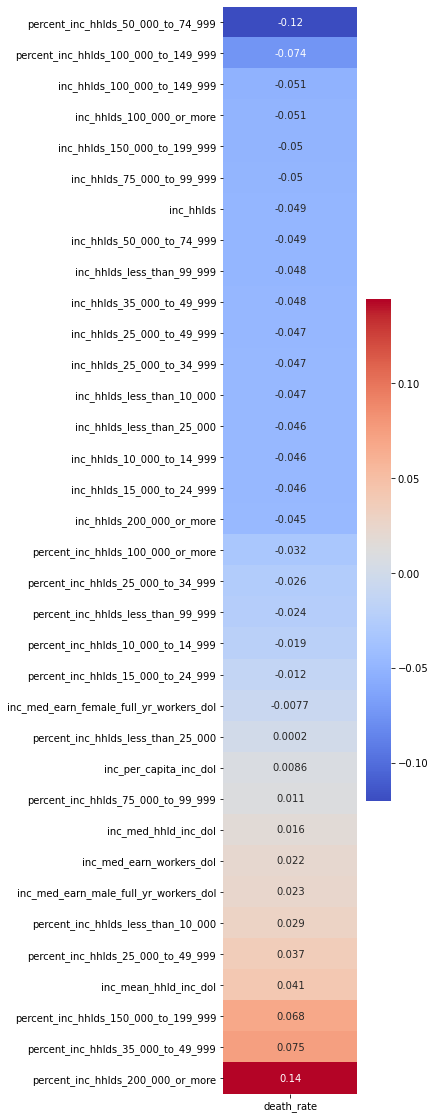

In [50]:
# Visualize the correlation between the variables.
# Save a correlation table to a variable.
corr = tx_inc.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 20))
sns.heatmap(corr[['death_rate']].sort_values(by='death_rate').iloc[:-1], annot=True, cmap = 'coolwarm');